# Why Bike Sharing?
Bike sharing has been gaining prominence over the last few decades. More and more people are turning towards healthy and livable cities where activities like bike sharing are easily available. There are plenty of benefits from bike sharing, like the environmental benefits. It has become a greener way to travel.

 There are plenty of benefits from bike sharing, like the environmental benefits. It has become a greener way to travel.
 
 
Capital bikeshare has two types of passes available for the riders: Casual (Single-Trip, 24 Hour Pass or 3 Day Pass) and Registered (Monthly or Annual Membership)

## Problem Statement
How natural and man-made factors are affecting the bike rental demand for Capital Bike share System in Washington DC?

Natural factors include seasons, months, day of week ,peak timings, working and non-working days, temperature, humidity etc. and man made factors consists of location of bike station, characteristics of the area.


This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. The dataset contains 17379 rows (every hour of each day for 2011 and 2012) and 17 columns (the features which are under consideration). We also included the trip data for year 2011 for analysing the station level data.

In [4]:
# !pip install zipfile
# !pip install kaggle
import zipfile
import kaggle

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [1]:
#importing the necessary libraries 
import os 

import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

In [19]:
# We will load the dataset from kaggle API
!kaggle datasets download -d devarajv88/yulu-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/yulu-dataset
License(s): other
yulu-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
# Extract the Zip file
zipfile_name = 'yulu-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

NameError: name 'zipfile' is not defined

In [20]:
bikes = pd.read_csv("yulu.csv")
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
bikes.weather.unique()
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

array([1, 2, 3, 4], dtype=int64)

In [22]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
print(f"# rows: {bikes.shape[0]} \n# columns: {bikes.shape[1]}")


# rows: 10886 
# columns: 12


In [24]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [25]:
bikes.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [26]:
bikes.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [27]:
# specifying the column names that I want to use
new_cols_dict ={
    'datetime':'time',
    'temp':'temp_real_C',
    'atemp':'temp_feels_like_C',
    'humidity':'humidity_percent',
    'windspeed':'wind_speed_kph',
    'weather_code':'weather',
    'holiday':'is_holiday',
    'workingday':'is_workingday',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)
bikes

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [28]:
bikes.humidity_percent = bikes.humidity_percent / 100

In [29]:
bikes['time']= pd.to_datetime(bikes['time'])
 
# Check the format of 'Date' column
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               10886 non-null  datetime64[ns]
 1   season             10886 non-null  int64         
 2   is_holiday         10886 non-null  int64         
 3   is_workingday      10886 non-null  int64         
 4   weather            10886 non-null  int64         
 5   temp_real_C        10886 non-null  float64       
 6   temp_feels_like_C  10886 non-null  float64       
 7   humidity_percent   10886 non-null  float64       
 8   wind_speed_kph     10886 non-null  float64       
 9   casual             10886 non-null  int64         
 10  registered         10886 non-null  int64         
 11  count              10886 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 1020.7 KB


In [33]:
df = bikes.copy()
df

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,0.81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,0.50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,0.57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,0.61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,0.61,6.0032,12,117,129


In [34]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '1':'Spring',
    '2':'Summer',
    '3':'Fall',
    '4':'Winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1':'Clear / Partly cloudy',
    '2':'Mist + Scattered clouds',
    '3':'Light Rain + Scattered clouds / Light snow',
    '4':'Heavy Rain + Thunderstorm + Mist / Snow + Fog / Ice Pallets'
}
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)
bikes

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear / Partly cloudy,9.84,14.395,0.81,0.0000,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear / Partly cloudy,9.02,13.635,0.80,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear / Partly cloudy,9.02,13.635,0.80,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,Clear / Partly cloudy,9.84,14.395,0.75,0.0000,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,Clear / Partly cloudy,9.84,14.395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear / Partly cloudy,15.58,19.695,0.50,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0,1,Clear / Partly cloudy,14.76,17.425,0.57,15.0013,10,231,241
10883,2012-12-19 21:00:00,Winter,0,1,Clear / Partly cloudy,13.94,15.910,0.61,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,0,1,Clear / Partly cloudy,13.94,17.425,0.61,6.0032,12,117,129


In [ ]:
# This data set is used to build tableau dashboard to view the most important metrics at a glance which is also interactive and easy to use
# bikes.to_excel('yulu_bikes_dataset.xlsx', sheet_name='Data')
# Please find the link to the tableau dashboard here : 

In [35]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday
df

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,0.81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,0.50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,0.57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,0.61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,0.61,6.0032,12,117,129,2012,12,19,22,2


## Exploratory Data Analysis

In [76]:
# plt.figure(figsize=(20,4))
# ax = sns.boxplot(x = 'count',data = bikes)
# ax.set_title('Box plot for count')
# plt.show()

We can see a lot of outliers in our target variable "count", therefore we can say the target is not balanced.

In [75]:
# plt.figure(figsize=(8,4))
# ax = sns.boxplot(data=df, x="season", y="count")
# ax.set_title('Variation of count with season')

# tick_val=[0,1, 2, 3]
# tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
# plt.xticks(tick_val, tick_lab)
# plt.show()

In [40]:
df

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,0.81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,0.50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,0.57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,0.61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,0.61,6.0032,12,117,129,2012,12,19,22,2


We can see the bike rental count is highest in the summer season followed by spring and fall and winter see low rental counts

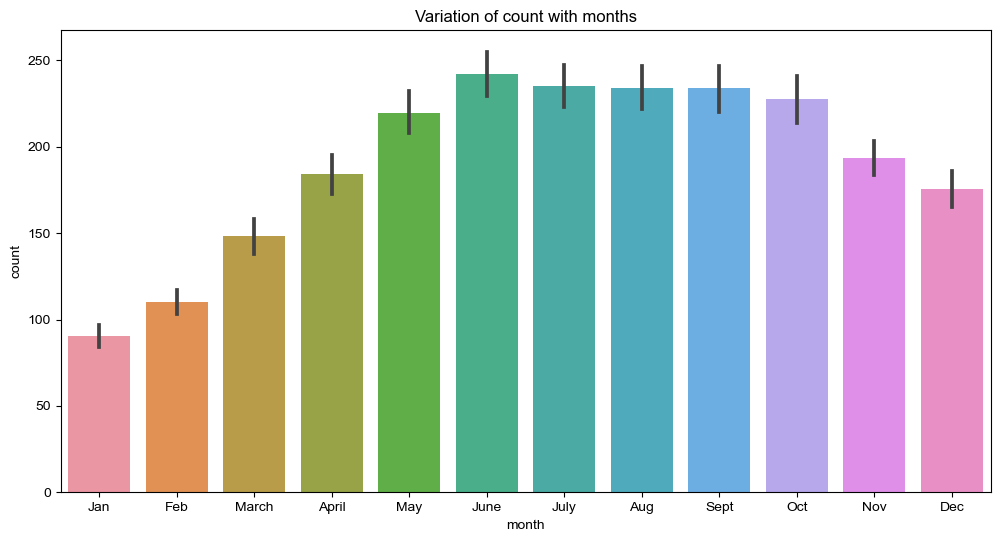

In [41]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=df)
ax.set_title('Variation of count with months')
sns.set(style="whitegrid")

tick_val=[0,1, 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

From above figure we can infer that rental counts are highest in the month of June, July and August,September, similarly fall months (Sept, Oct and Nov) have second highest bike rental. So the variation of rental bikes with month is similar to the seasons.

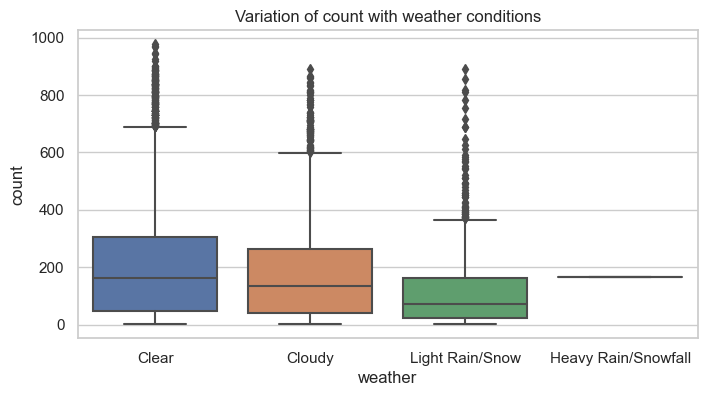

In [42]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df, x="weather", y="count")
ax.set_title('Variation of count with weather conditions')

tick_val=[0,1, 2, 3]
tick_lab=['Clear', 'Cloudy', 'Light Rain/Snow','Heavy Rain/Snowfall']
plt.xticks(tick_val, tick_lab)
plt.show()

If we look at the weather conditons, Clear weather has the highest rental count as expected and their are a lot of outliers for cloudy and light rain/snow weather conditions.

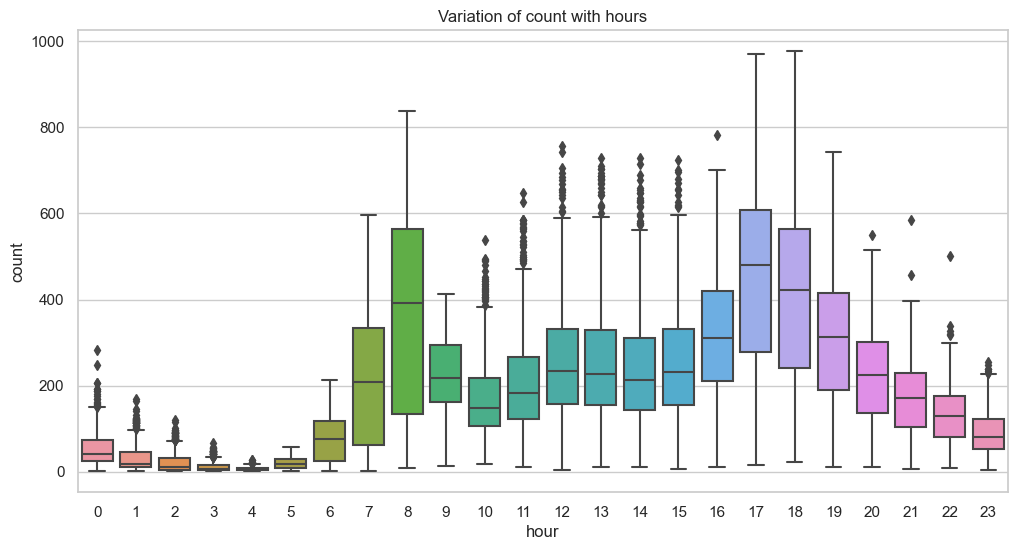

In [43]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hour', y='count', data=df)
ax.set_title('Variation of count with hours')
sns.set(style="whitegrid")

This box plot of variation of bike rental count with hours shows the average number of bikes duirng peak hours like in the morning (7am - 9 am) and in the evening (5pm - 7 pm) is around 400 bikes.

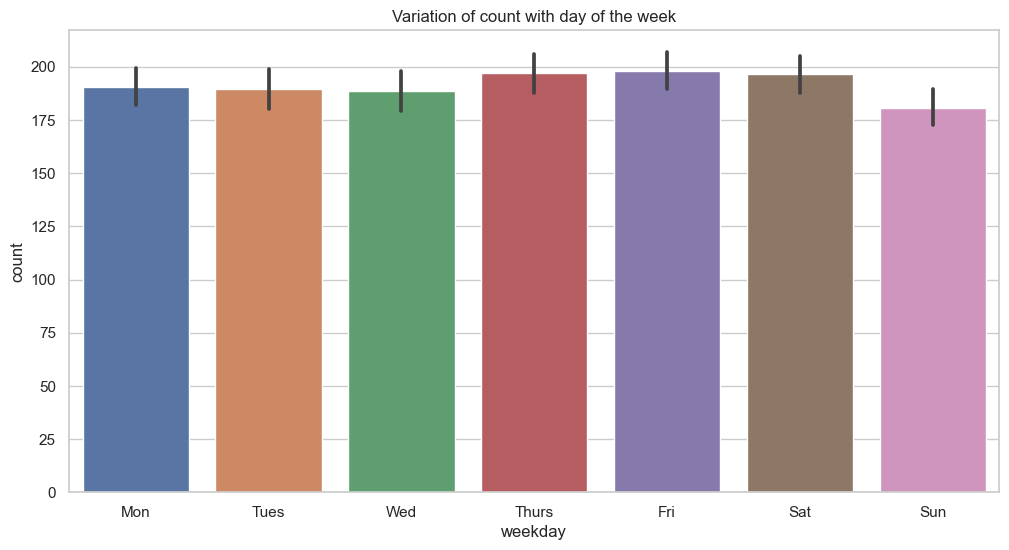

In [44]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="weekday",y='count',data=df)
ax.set_title('Variation of count with day of the week')
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat','Sun']
plt.xticks(tick_val, tick_lab)
plt.show()

The bike rental count with day of the week doesnt vary a lot, it is almost constant for all days.

<Axes: xlabel='is_workingday', ylabel='count'>

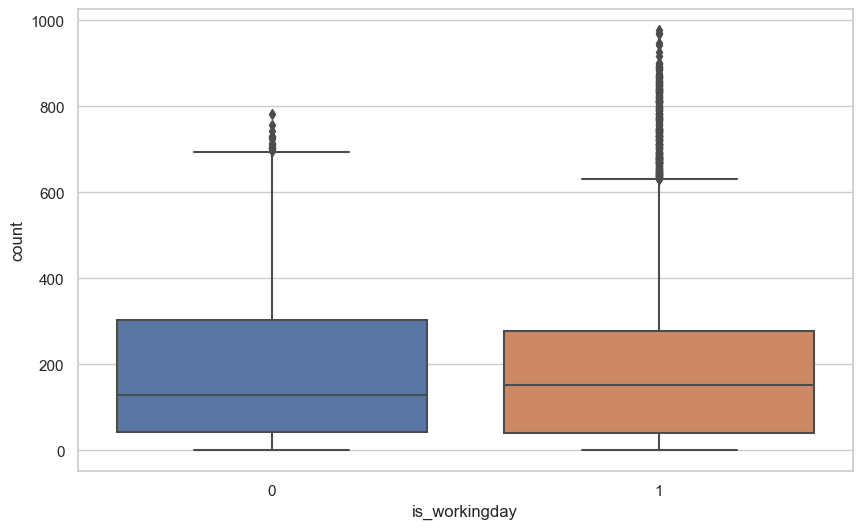

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x=df["is_workingday"],y=df["count"])

There is not a significant difference in the total rental bike count on working day and non working day

In [70]:
df.groupby(["is_workingday"])[["casual","registered","count"]].sum()

,casual,registered,count
is_workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


##### We will now look at the variation of rental bikes separately for registered and casual users.

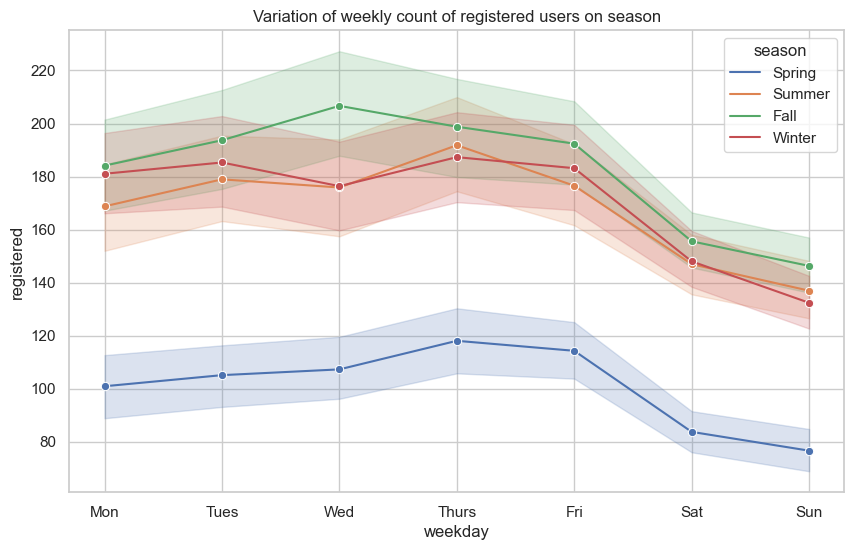

In [42]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='registered', data=df, hue='season',marker = 'o')
ax.set_title('Variation of weekly count of registered users on season')
sns.set(style="whitegrid")
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat','Sun']
plt.xticks(tick_val, tick_lab)
plt.show()

For registered users, the count of rental bikes is more during weekdays showing the registered users follow a regular riding pattern.

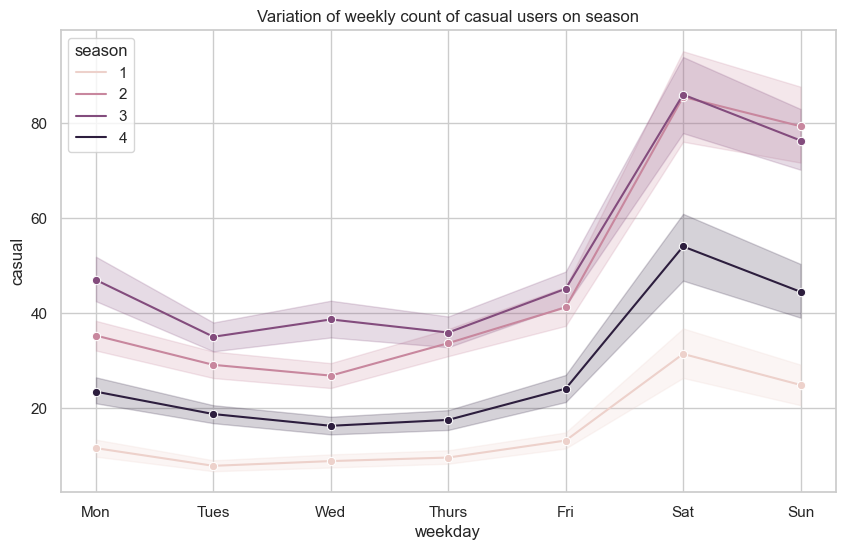

In [45]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='casual', data=df, hue='season',marker = 'o')
ax.set_title('Variation of weekly count of casual users on season')
sns.set(style="whitegrid")
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat','Sun']
plt.xticks(tick_val, tick_lab)
plt.show()

The variation of rental counts with day of week for casual users show that the count is high on weekends whereas it is low and almost same for all the weekdays. This means casual riders may have a good composition of tourists who use bikes for local sightseeing and recreation activities

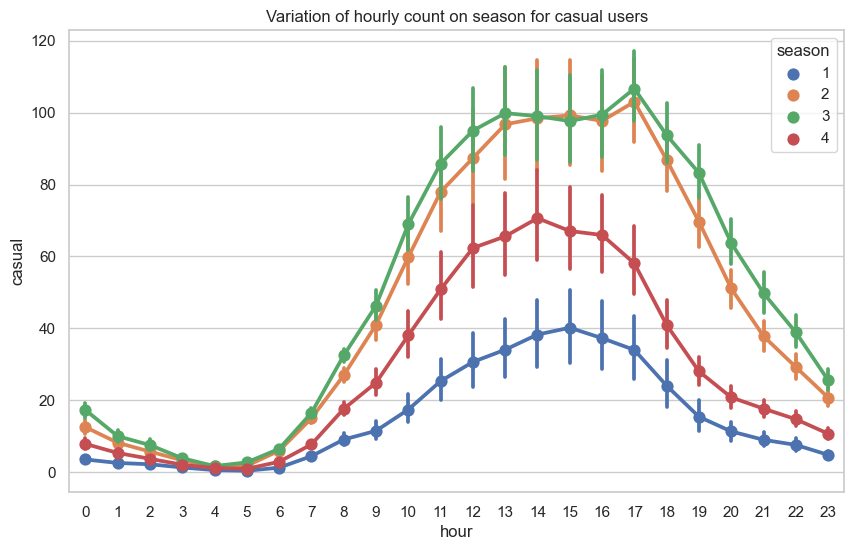

In [46]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='casual', data=df, hue='season')
ax.set_title('Variation of hourly count on season for casual users')
sns.set(style="whitegrid")

Hourly count for casual users show that they are most active during the afternoon hours (11am - 6 pm), so they mostly use bike rentals for recreation purposes.

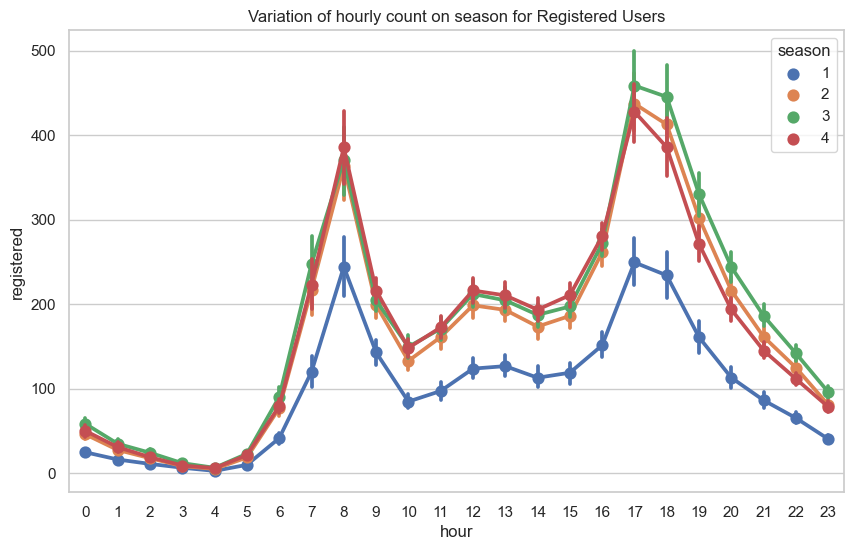

In [48]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='registered', data=df, hue='season')
ax.set_title('Variation of hourly count on season for Registered Users')
sns.set(style="whitegrid")

Hourly count of bike rentals for registered users show that ridership pattern for registered users is mostly office-commuter oriented as the demand is high during peak morning hours (7 am - 9 am) and evening hours(5 pm - 7pm).

Variation of rental count with temperature for casual and registered users


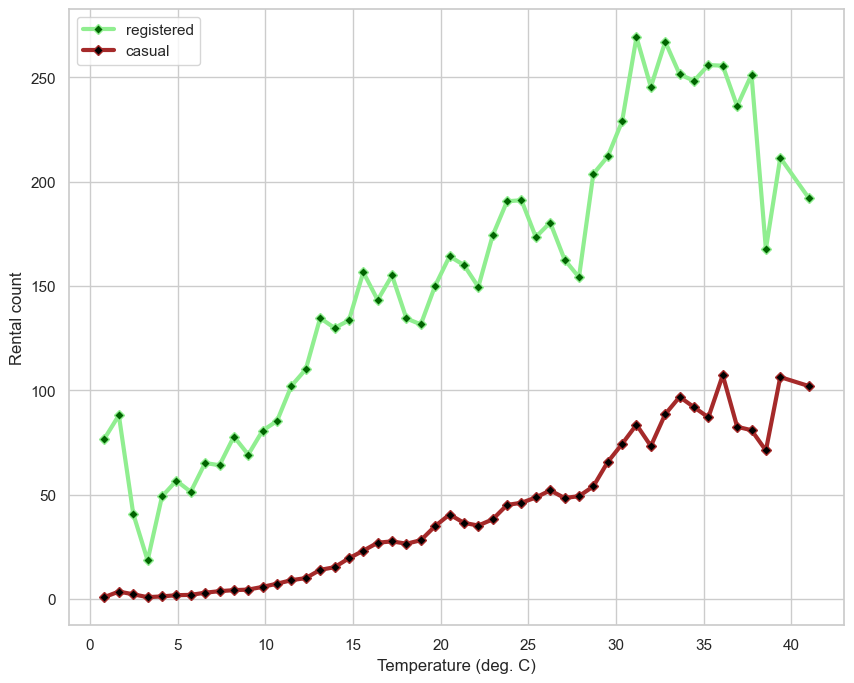

In [49]:
temp_reg = df.groupby(['temp_real_C'])['registered'].mean()
temp_cas = df.groupby(['temp_real_C'])['casual'].mean()

fig,axes = plt.subplots(figsize=(10, 8))

temp_reg.plot(kind = 'line', marker='D', markerfacecolor='darkgreen', markersize=5, color='lightgreen', linewidth=3)
temp_cas.plot(kind = 'line', marker='D', markerfacecolor='black', markersize=5, color='brown', linewidth=3)
print('Variation of rental count with temperature for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Temperature (deg. C)')
plt.ylabel('Rental count')
plt.show()


If we look at the variation of bike counts with temperature, people like to ride more in a fairly hot temperature(ride count is high for temperatures beyond 30 deg Celsius, however as the temperature becomes extremely high ridership drops which is expected.

Variation of rental count with humidity percentage for casual and registered users


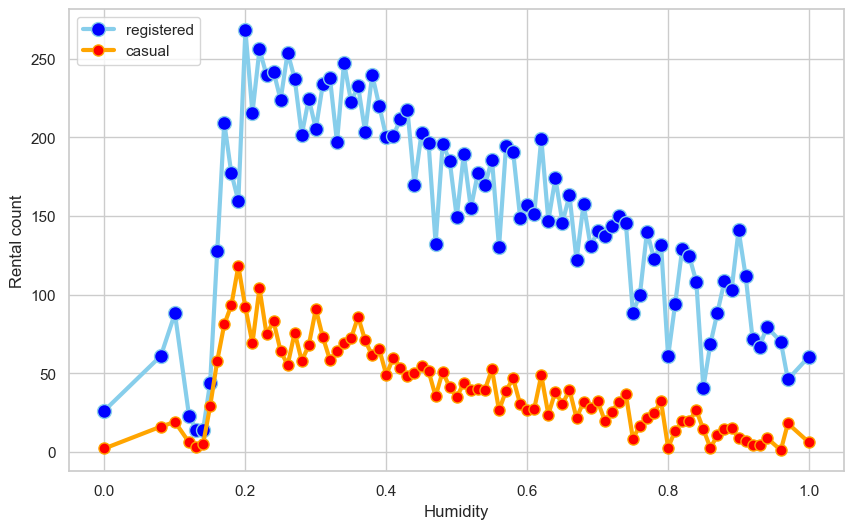

In [50]:
hum_reg = df.groupby(['humidity_percent'])['registered'].mean()
hum_cas = df.groupby(['humidity_percent'])['casual'].mean()
fig,axes = plt.subplots(figsize=(10, 6))


hum_reg.plot(kind = 'line', marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=3)
hum_cas.plot(kind = 'line',color = 'orange',marker = 'o', markerfacecolor='red', markersize=8,linewidth=3)
print('Variation of rental count with humidity percentage for casual and registered users')

plt.legend(loc='upper left')
plt.xlabel('Humidity')
plt.ylabel('Rental count')
plt.show()

We can see from above that bike rental is more when humidity is less which is expected as humidity increases due to more perspiration people would avoid riding bikes.

Variation of bike rental count with windspeed


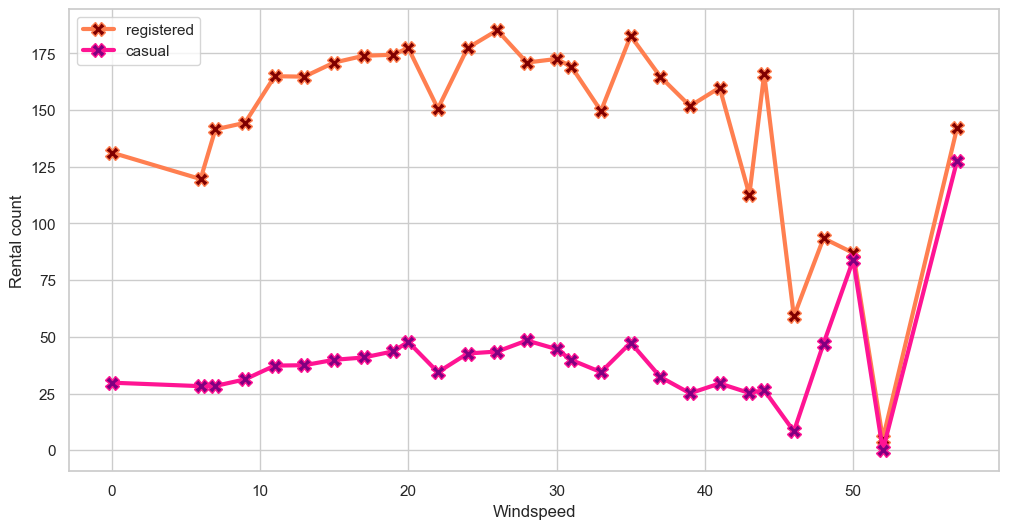

In [51]:
windspeed_reg = df.groupby(['wind_speed_kph'])['registered'].mean()
windspeed_cas = df.groupby(['wind_speed_kph'])['casual'].mean()
fig,axes = plt.subplots(figsize=(12, 6))

windspeed_reg.plot(kind = 'line', marker='X', markerfacecolor='maroon', markersize= 10, color='coral', linewidth=3)
windspeed_cas.plot(kind = 'line', marker='X', markerfacecolor='purple', markersize= 10, color='deeppink', linewidth=3)
print('Variation of bike rental count with windspeed')

plt.legend(loc='upper left')
plt.xlabel('Windspeed')
plt.ylabel('Rental count')
plt.show()

From the above graph we can see people prefer moderate windspeed as bike rental counts are highest for low windspeed.



In [52]:
df

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,0.81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,0.50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,0.57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,0.61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,0.61,6.0032,12,117,129,2012,12,19,22,2


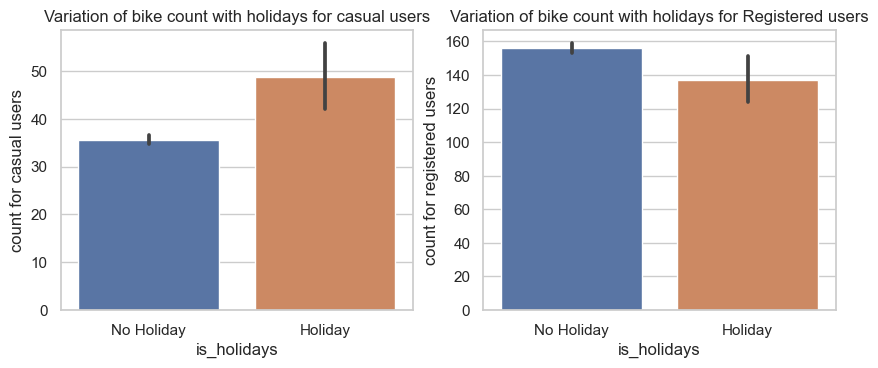

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
ax = sns.barplot(x="is_holiday",y='casual',data=bikes)
plt.xlabel("is_holidays")
plt.ylabel("count for casual users")
ax.set_title('Variation of bike count with holidays for casual users')

tick_val=[0,1]
tick_lab=['No Holiday','Holiday']
plt.xticks(tick_val, tick_lab)

plt.subplot(2, 2, 2)
ax = sns.barplot(x="is_holiday",y='registered',data=bikes)
plt.xlabel("is_holidays")
plt.ylabel("count for registered users")
ax.set_title('Variation of bike count with holidays for Registered users')

tick_val=[0,1]
tick_lab=['No Holiday','Holiday']
plt.xticks(tick_val, tick_lab)
plt.show()

Casual users tend to ride more bikes during holidays whereas registered users are usually the office going users so they are more active on working days

### Findings
1. Casual and registered users have a different pattern of riding bike rentals.
2. Registered users are more active during weekdays and casual users are more active during weekends.
3. Registered users are mostly office commuter whereas casual users consists more of tourists and people indulging in recreation activities.
4. Both casual and registered users prefer warm climate with favourable humidity and windspeed conditions for riding bikes.
5. Summers are preferred more as compared to any other season and clear weather conditions see more bike rentals.

Univariate Analysis

In [73]:
df

,time,season,is_holiday,is_workingday,weather,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,0.81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,0.80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,0.75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,0.50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,0.57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,0.61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,0.61,6.0032,12,117,129,2012,12,19,22,2


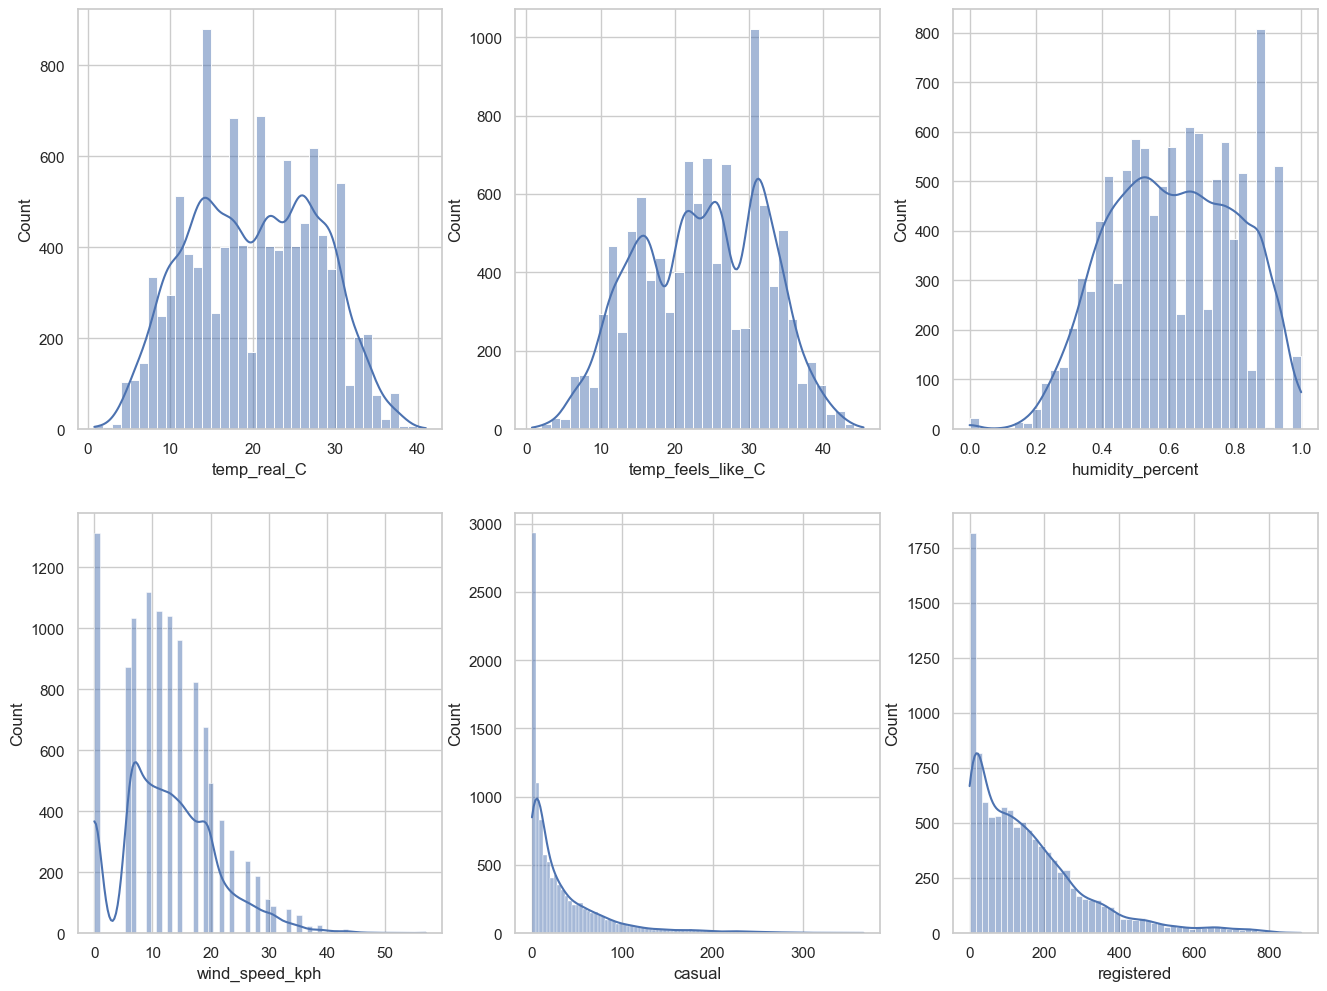

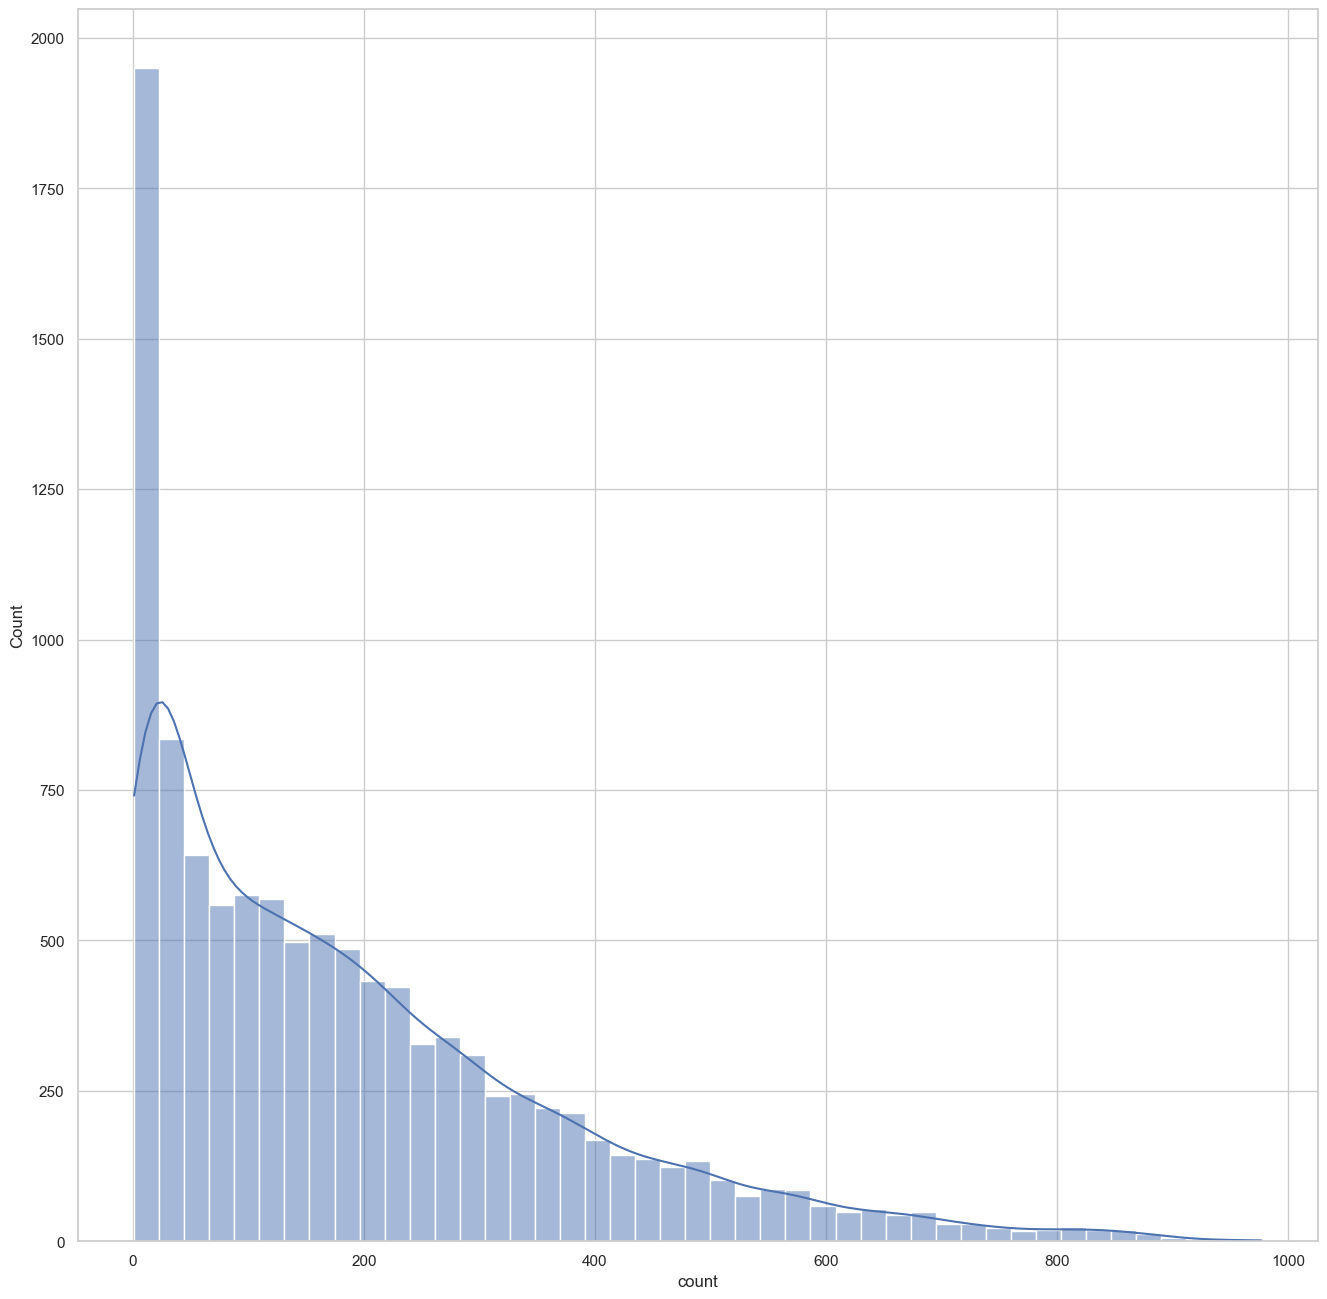

In [74]:
num_cols = ['temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

1. casual, registered and count somewhat looks like Log Normal Distrinution
2. temp, atemp and humidity looks like they follows the Normal Distribution
3. windspeed follows the binomial distribution

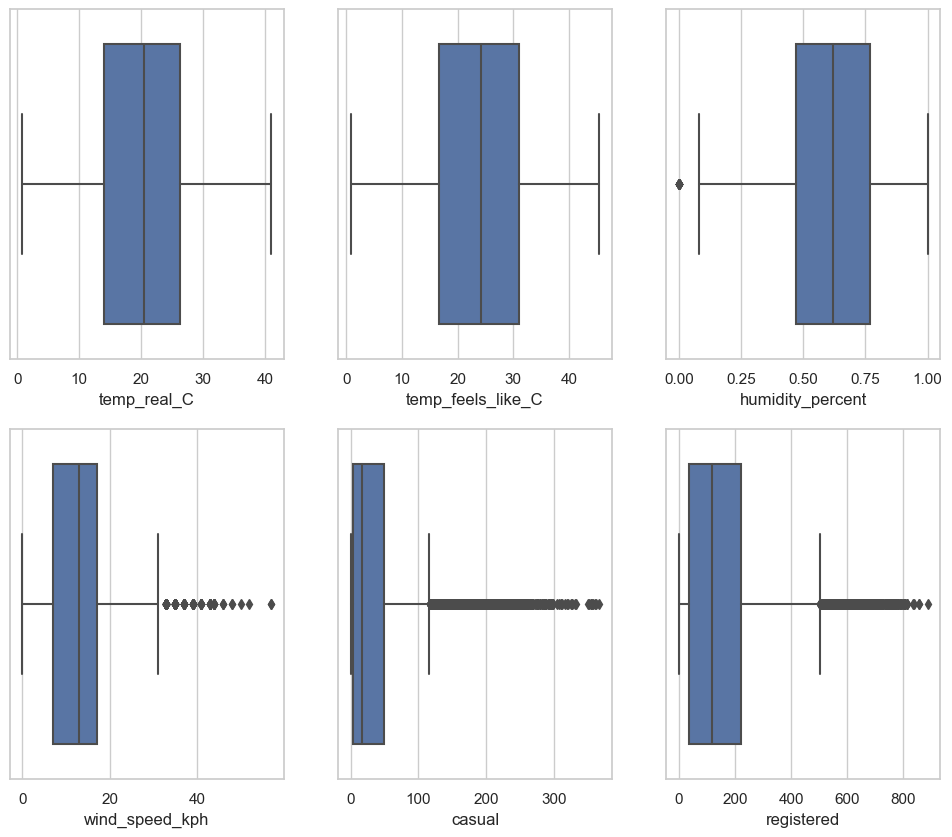

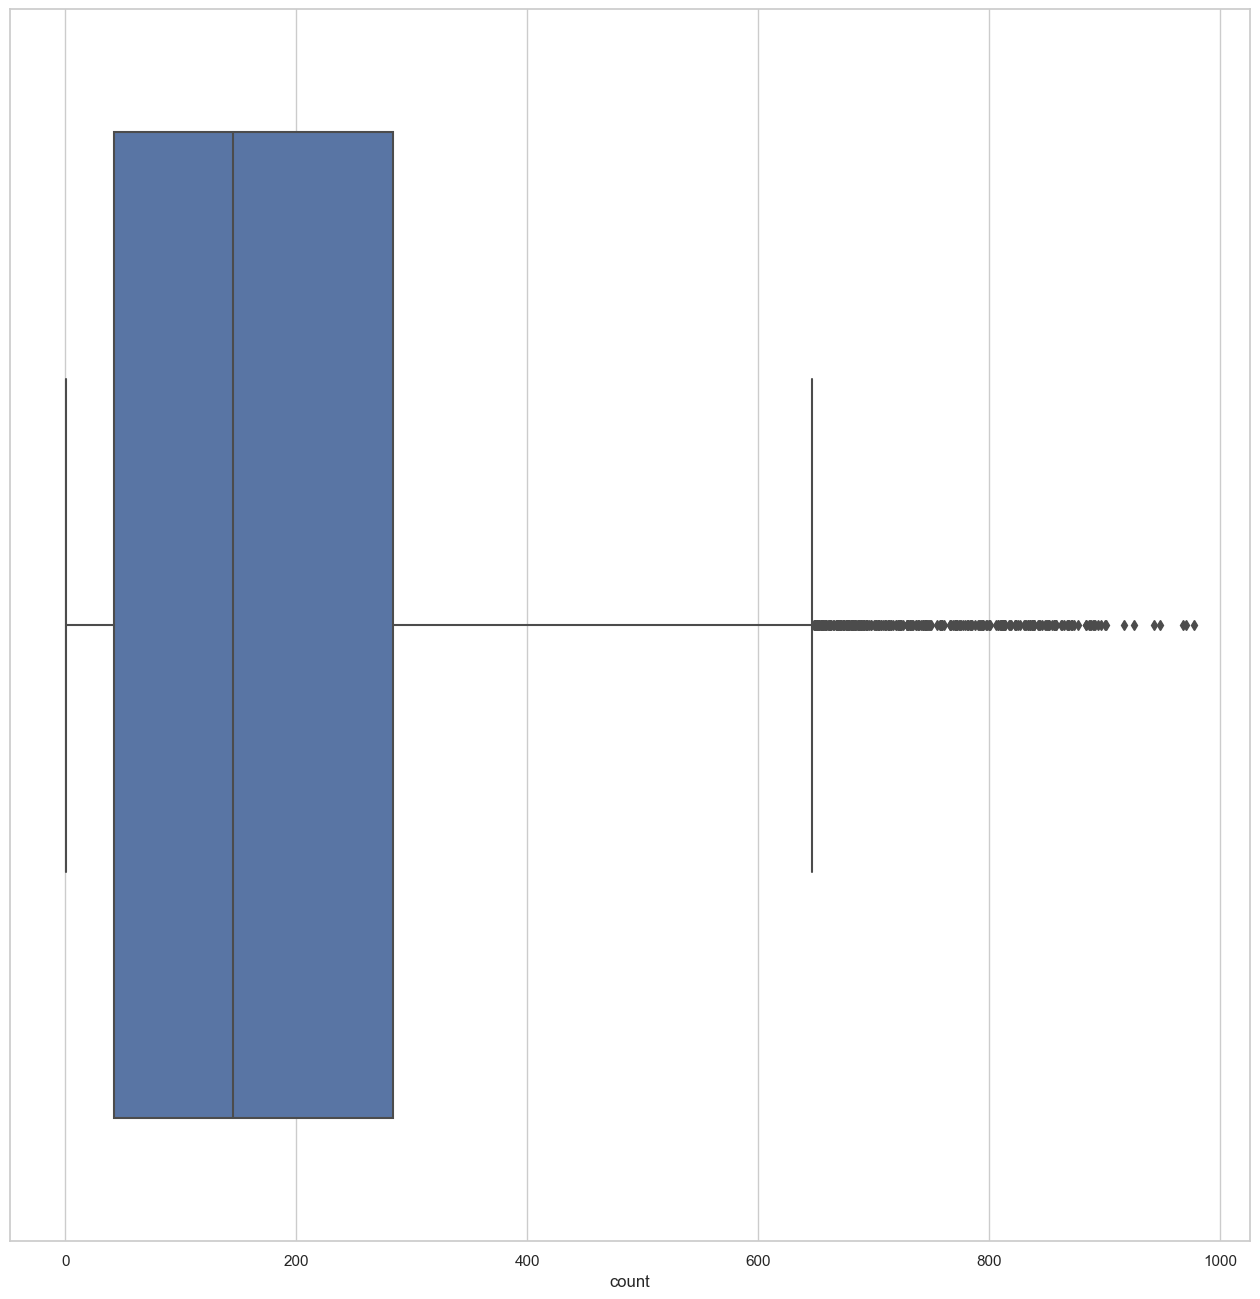

In [81]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()


Looks like humidity, casual, registered and count have outliers in the data.


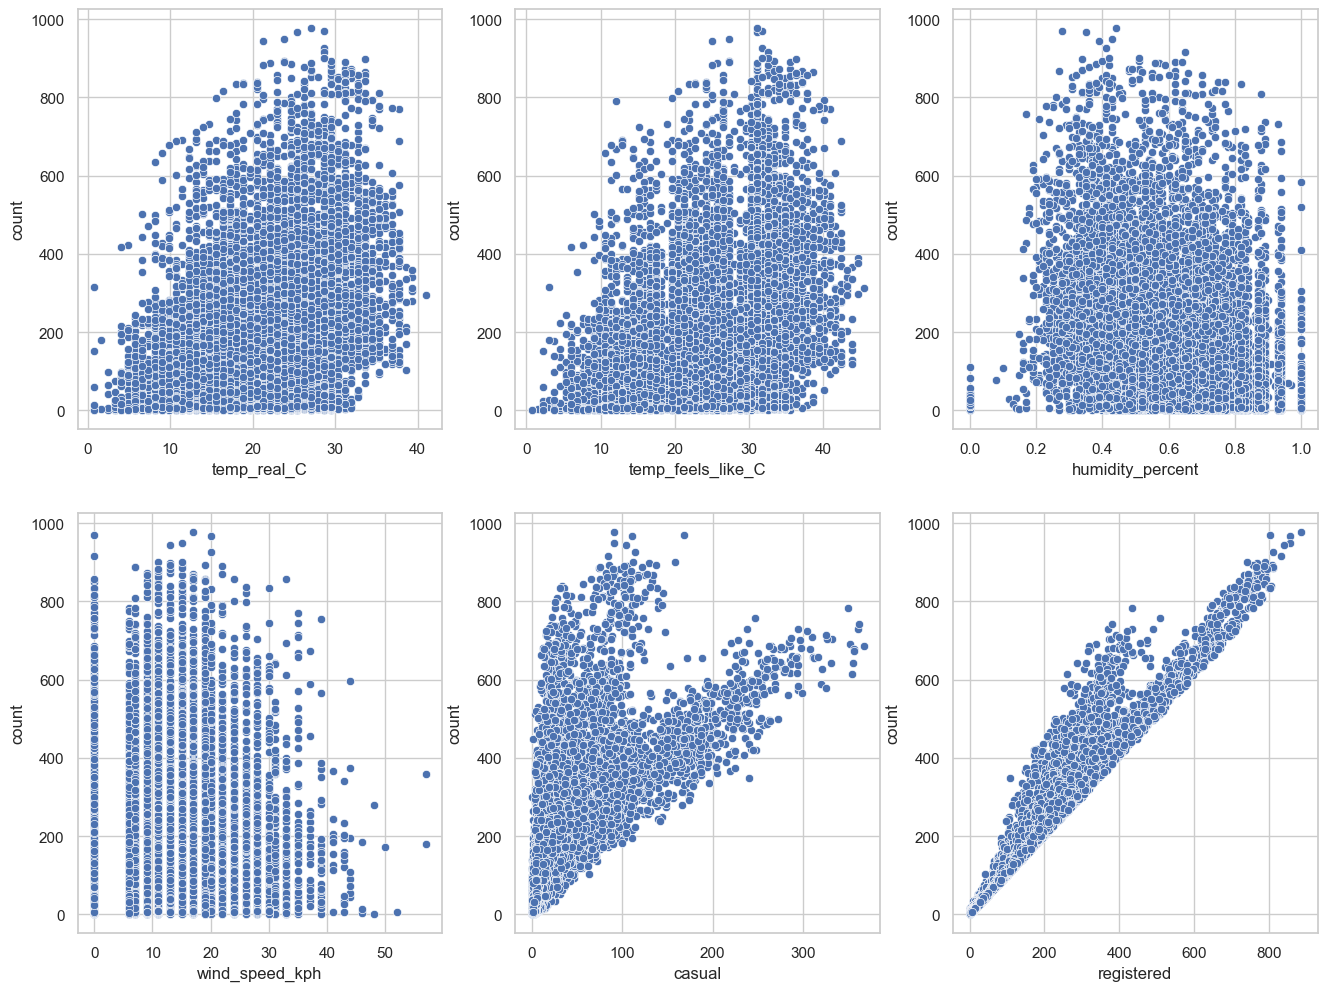

In [82]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

In [84]:
df.corr()['count']

time                 0.310187
season               0.163439
is_holiday          -0.005393
is_workingday        0.011594
weather             -0.128655
temp_real_C          0.394454
temp_feels_like_C    0.389784
humidity_percent    -0.317371
wind_speed_kph       0.101369
casual               0.690414
registered           0.970948
count                1.000000
year                 0.260403
month                0.166862
day                  0.019826
hour                 0.400601
weekday             -0.002283
Name: count, dtype: float64

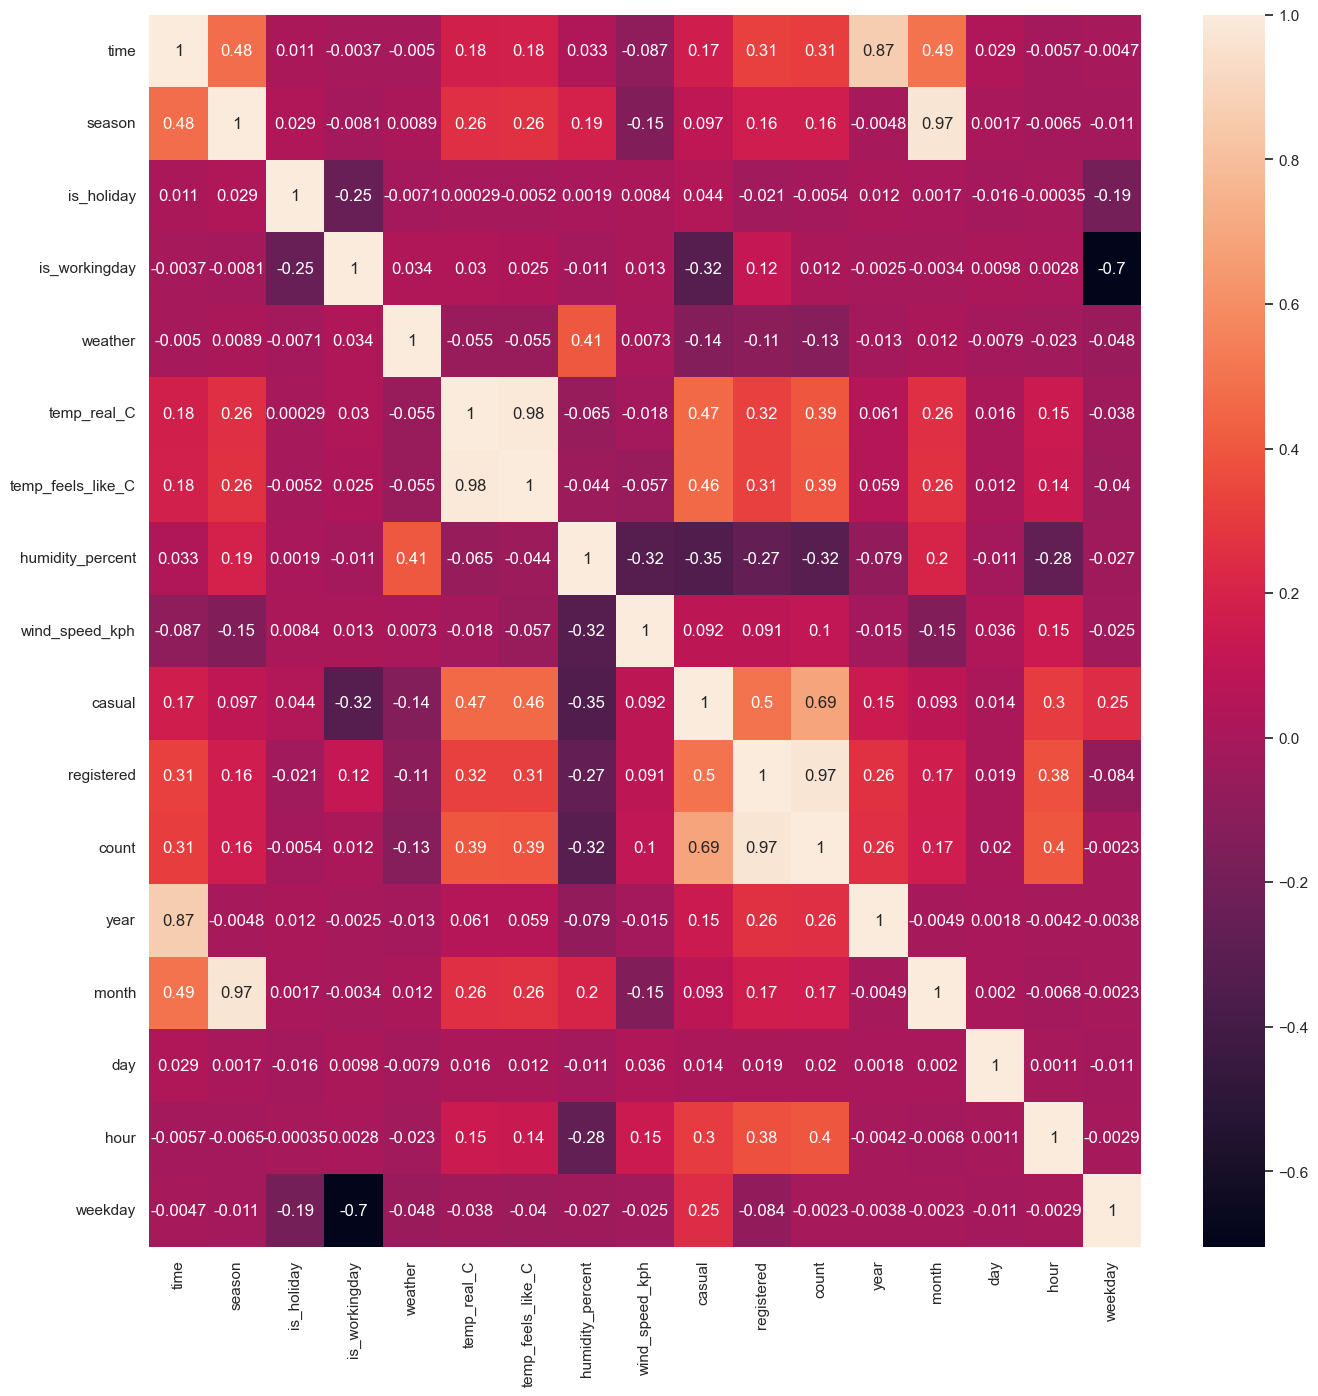

In [91]:
# plt.figure(figsize=(12,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Hypothesis Testing

Hypothesis Testing - 1

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

We will use chi-square test to test hypyothesis defined above.

Usage: Chi-square test is used to examine the association between two categorical variables (e.g., weather conditions and seasons) in a contingency table.

Explanation: It assesses whether the observed distribution of categorical variables differs significantly from the expected distribution, helping us understand if there is a relationship between weather and seasons affecting bike rental patterns.

In [53]:
import pandas as pd
import scipy.stats as stats

Creating Contingency Table: This table shows the frequency distribution of the variables.

In [54]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
print(data_table)

Observed values:
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


Finding p value, Chi-square statistic, degree of freedom and expected frequency through scipy stats library


In [55]:
#finding p value, Chi-square statistic, degree of freedom and expected frequency through scipy stats library
chi2, p, dof, expected = stats.chi2_contingency(data_table)
print(f"\nChi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected Frequencies:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


Manually calculate Chi-Square Test Statistic, p value and degree of freedom (for educational purposes)


In [56]:
# Manually calculate Chi-Square Test Statistic, p value and degree of freedom(for educational purposes)
chi_sqr_statistic = sum([(o - e) ** 2 / e for o, e in zip(data_table.values.flatten(), expected.flatten())])
print("Manual Chi-Square Test Statistic:", chi_sqr_statistic)

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

Manual Chi-Square Test Statistic: 49.15865559689363
p-value: 1.5499250738404413e-07
degrees of freedom:  9


Calculate Critical value and compare p value with alpha

In [63]:
# Calculate the critical value
alpha = 0.05
critical_val = stats.chi2.ppf(q=1 - alpha, df=dof)
print(f"Critical Value: {critical_val}")

if p <= alpha:
    print("\nSince the p-value is less than the alpha 0.05, we reject the Null Hypothesis. This means that weather is dependent on the season.")
else:
    print("\nSince the p-value is greater than the alpha 0.05, we do not reject the Null Hypothesis. This means that weather is independent of the season.")

Critical Value: 16.918977604620448

Since the p-value is less than the alpha 0.05, we reject the Null Hypothesis. This means that weather is dependent on the season.


## Hypothesis Testing - 2

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

We will use the 2-Sample T-Test to test the hypothess defined above


Usage: The t-test is used to compare the means of two independent groups (e.g., bike rentals on holidays vs. non-holidays, or working days vs. non-working days).

Explanation: It determines whether the difference between the means of two groups is statistically significant, helping us assess if categorical variables (like holidays or working days) affect rental counts differently.

In [76]:
# Define the two groups
data_group1 = df[df['is_workingday'] == 0]['count'].values
data_group2 = df[df['is_workingday'] == 1]['count'].values

In [77]:
#Calculate the variances
var_group1 = np.var(data_group1, ddof=1)
var_group2 = np.var(data_group2, ddof=1)
print(f"Variance of group 1 (non-working days): {var_group1}")
print(f"Variance of group 2 (working days): {var_group2}")

Variance of group 1 (non-working days): 30180.03350064094
Variance of group 2 (working days): 34045.29037312209


In [78]:
# Check the ratio of variances
ratio = var_group2 / var_group1
print(f"Ratio of variances (group2/group1): {ratio}")

# Perform the 2-Sample T-Test assuming equal variances
t_stat, p_value = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Perform the 2-Sample T-Test not assuming equal variances (Welch's t-test)
t_stat_welch, p_value_welch = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=False)
print(f"Welch's T-Statistic: {t_stat_welch}")
print(f"Welch's P-Value: {p_value_welch}")


Ratio of variances (group2/group1): 1.1280733128543101
T-Statistic: -1.2096277376026694
P-Value: 0.22644804226361348
Welch's T-Statistic: -1.2362580418223226
Welch's P-Value: 0.21640312280695098


In [79]:
# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (equal variances): Working day has no effect on the number of cycles being rented.")
else:
    print("Reject the null hypothesis (equal variances): Working day has an effect on the number of cycles being rented.")

if p_value_welch > alpha:
    print("Fail to reject the null hypothesis (Welch's t-test): Working day has no effect on the number of cycles being rented.")
else:
    print("Reject the null hypothesis (Welch's t-test): Working day has an effect on the number of cycles being rented.")

Fail to reject the null hypothesis (equal variances): Working day has no effect on the number of cycles being rented.
Fail to reject the null hypothesis (Welch's t-test): Working day has no effect on the number of cycles being rented.


Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

## Hypothesis Testing - 3

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

Here, we will use the ANOVA to test the hypothess defined above

Usage: ANOVA is used to compare the means of more than two groups (in this case, seasons, holidays, or working days) to determine if there are statistically significant differences among them.

Explanation: ANOVA helps us understand if variations in categorical variables (e.g., different seasons) have a significant impact on the numerical outcome (e.g., bike rental counts), providing insights into seasonal patterns and their effects.

In [80]:
df['interaction'] = df['season'] + '_' + df['weather']

In [83]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform ANOVA
model = ols('count ~ C(interaction)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq       df          F         PR(>F)
C(interaction)  2.848398e+07     12.0  78.520629  7.760265e-186
Residual        3.286889e+08  10873.0        NaN            NaN


In [84]:
# Interpretation
alpha = 0.05
p_value = anova_table['PR(>F)'][0]
if p_value < alpha:
    print("Reject the null hypothesis: Number of cycles rented is not similar in different weather and season combinations.")
else:
    print("Fail to reject the null hypothesis: Number of cycles rented is similar in different weather and season combinations.")

Reject the null hypothesis: Number of cycles rented is not similar in different weather and season combinations.


#### Insights
- Summers and fall seasons are preferred more as compared to any other season and clear weather conditions see more bike rentals.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Casual and registered users have a different pattern of riding bike rentals.
- Registered users are more active during weekdays and casual users are more active during weekends.
- Registered users are mostly office commuter whereas casual users consists more of tourists and people indulging in recreation activities.
- Both casual and registered users prefer warm climate with favourable humidity (>20%) and windspeed conditions (>35kph) for riding bikes.

### Recommendations

- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very hot days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.

- Since the season has effect on rentals, company must have high stock in rentals to cater the demand during the seasonal time in comparison to the other off season times (Summer and fall seasons are favourable)
- Since the registered users are highest contributors, this show positive sign of the service provided by the company and must continue maintaining the levels during the highest demand spike seasons too
- Based on the weather conditions,rentals happens mostly during the clearsky and in other conditions can take bikes for maintanence based on pareto principle

### Recommendations

1. **Optimize Inventory for Seasonal Demand**:
   Increase the number of available bikes during summer and fall to meet higher rental demand, ensuring sufficient stock to maximize revenue during these peak seasons.

2. **Holiday and Weekend Readiness**:
   Prepare for spikes in rentals by ensuring additional bike availability during holidays and weekends. This strategy capitalizes on the higher demand observed during non-working days.

3. **Weather-Responsive Inventory Management**:
   Reduce the number of bikes in stock on days with extreme temperatures (below 10°C or excessively hot) or very low humidity. This approach minimizes operational costs by aligning supply with expected lower demand.

4. **Targeted User Engagement**:
   Implement marketing and promotional campaigns that cater specifically to casual users on weekends and registered users on weekdays. Tailored strategies will enhance user satisfaction and increase rentals among these distinct groups.

5. **Weather-Adaptive Maintenance Schedule**:
   Schedule bike maintenance on days with unfavorable weather conditions, such as high winds (>35 kph) or thunderstorms. This ensures that bikes are ready and well-maintained for optimal usage during clear weather periods.